# Libraries & Packages

**Import Neccessary Libraries & Packages:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from scipy.interpolate import griddata

# Building 1 Monthly, Daily, Hourly Trend Visualization

In [ ]:
# Importing MONTHLY file from GitHub for Monthly Data
url_monthly = 'https://raw.githubusercontent.com/gvanwalsen/adv-weather-norm/main/LV_B1_monthlyrawdata.csv'
df_monthly = pd.read_csv(url_monthly)

# Importing DAILY file from GitHub for Daily SVR attempt
url_daily = 'https://raw.githubusercontent.com/gvanwalsen/adv-weather-norm/main/LV_B1_dailyrawdata.csv'
df_daily = pd.read_csv(url_daily)

# Importing HOURLY file from GitHub for Daily SVR attempt
url_hourly = 'https://raw.githubusercontent.com/gvanwalsen/adv-weather-norm/main/LV_B1_hourlyrawdata.csv'
df_hourly = pd.read_csv(url_hourly)

**Monthly Trend Visualization:**

Also entire dataset visualization

Starting with Building #1

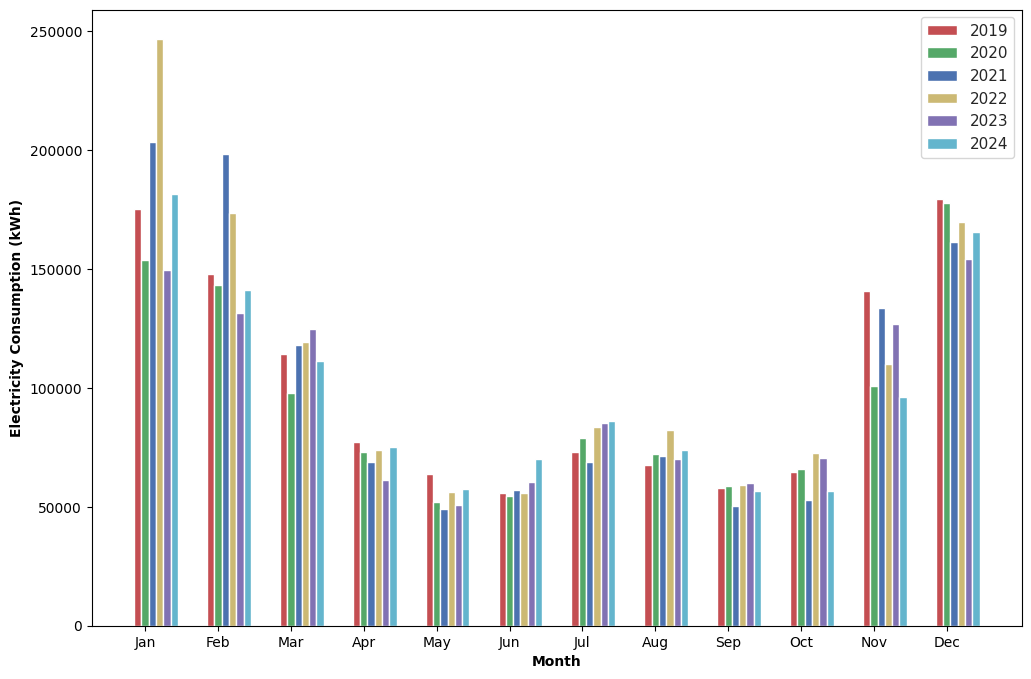

In [ ]:
# Light Data Re-arrangement
b1_monthly_arr = np.array(df_monthly)
b1_monthly_raw = b1_monthly_arr[0:72,0:4]
# print(b1_monthly_raw)

# Establish Baseline Value, Calculated in Different Python Notebook Using Same Dataset
monthly_baseline_b1 = 60673.99315
monthly_baseline_plot = np.repeat(monthly_baseline_b1, 12)

# Set Up Standard, Year to Year Bar Graph
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

x2019 = np.array(b1_monthly_arr[0:12,3:4])
# print(x2019)
x2020 = np.array(b1_monthly_arr[12:24,3:4])
# print(x2020)
x2021 = np.array(b1_monthly_arr[24:36,3:4])
# print(x2021)
x2022 = np.array(b1_monthly_arr[36:48,3:4])
# print(x2022)
x2023 = np.array(b1_monthly_arr[48:60,3:4])
# print(x2023)
x2024 = np.array(b1_monthly_arr[60:72,3:4])
# print(x2024)

t2019 = x2019.flatten()
t2020 = x2020.flatten()
t2021 = x2021.flatten()
t2022 = x2022.flatten()
t2023 = x2023.flatten()
t2024 = x2024.flatten()

br1 = np.arange(len(x2019))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

sns.set(style='whitegrid')
plt.bar(br1, t2019, color ='r', width = barWidth, edgecolor ='w', label ='2019')
plt.bar(br2, t2020, color ='g', width = barWidth, edgecolor ='w', label ='2020')
plt.bar(br3, t2021, color ='b', width = barWidth, edgecolor ='w', label ='2021')
plt.bar(br4, t2022, color ='y', width = barWidth, edgecolor ='w', label ='2022')
plt.bar(br5, t2023, color ='m', width = barWidth, edgecolor ='w', label ='2023')
plt.bar(br6, t2024, color ='c', width = barWidth, edgecolor ='w', label ='2024')
#plt.plot(br3, monthly_baseline_plot, color ='black', linewidth=4, label='Baseline')

plt.xlabel('Month', fontweight ='bold', fontsize = 10)
plt.ylabel('Electricity Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(x2019))],
        ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()
plt.show()

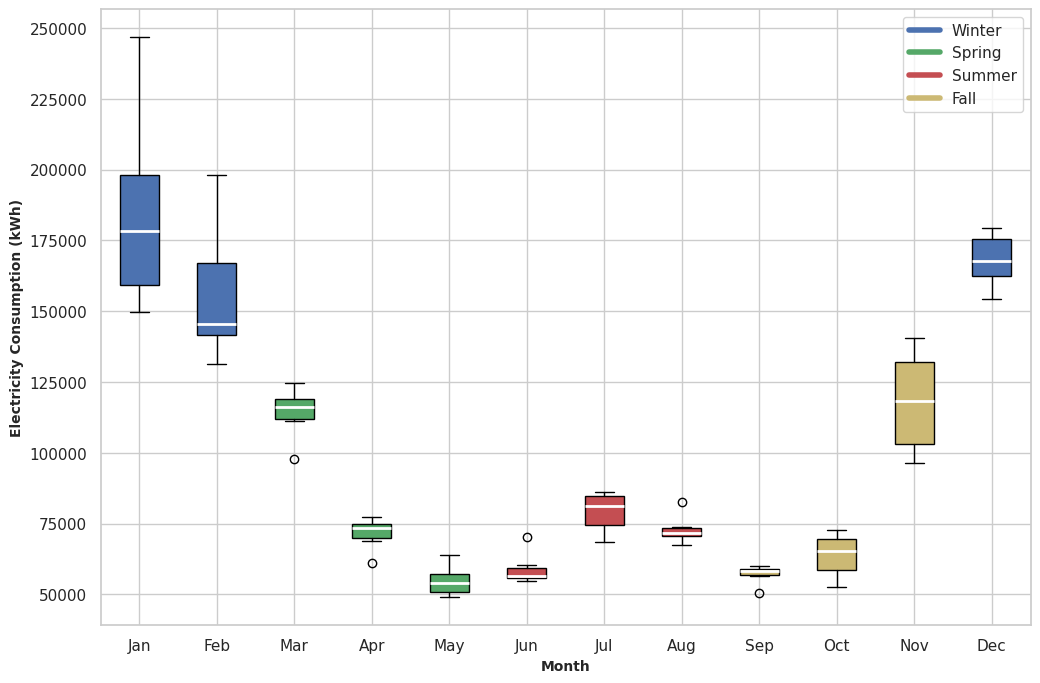

In [ ]:
# Set Up Boxplot Month to Month Plot, Disregard Specific Years of Interest
# Dataframe Arrangement:
b1_monthly_df = pd.DataFrame({'Year': b1_monthly_raw[:,0], 'Month': b1_monthly_raw[:,1], 'Season': b1_monthly_raw[:,2], 'EnergyUse': b1_monthly_raw[:,3]})
# print(b1_monthly_df)

# Seperate Data by Month, Prepare for Boxplotting:
xjan = b1_monthly_df[b1_monthly_df['Month'] == 1]
xjan_arr = np.array(xjan)
xjan_box = xjan_arr[:,3]
# print(xjan_box)

xfeb = b1_monthly_df[b1_monthly_df['Month'] == 2]
xfeb_arr = np.array(xfeb)
xfeb_box = xfeb_arr[:,3]
# print(xfeb_box)

xmar = b1_monthly_df[b1_monthly_df['Month'] == 3]
xmar_arr = np.array(xmar)
xmar_box = xmar_arr[:,3]
# print(xmar_box)

xapr = b1_monthly_df[b1_monthly_df['Month'] == 4]
xapr_arr = np.array(xapr)
xapr_box = xapr_arr[:,3]
# print(xapr_box)

xmay = b1_monthly_df[b1_monthly_df['Month'] == 5]
xmay_arr = np.array(xmay)
xmay_box = xmay_arr[:,3]
# print(xmay_box)

xjun = b1_monthly_df[b1_monthly_df['Month'] == 6]
xjun_arr = np.array(xjun)
xjun_box = xjun_arr[:,3]
# print(xjun_box)

xjul = b1_monthly_df[b1_monthly_df['Month'] == 7]
xjul_arr = np.array(xjul)
xjul_box = xjul_arr[:,3]
# print(xjul_box)

xaug = b1_monthly_df[b1_monthly_df['Month'] == 8]
xaug_arr = np.array(xaug)
xaug_box = xaug_arr[:,3]
# print(xaug_box)

xsep = b1_monthly_df[b1_monthly_df['Month'] == 9]
xsep_arr = np.array(xsep)
xsep_box = xsep_arr[:,3]
# print(xsep_box)

xoct = b1_monthly_df[b1_monthly_df['Month'] == 10]
xoct_arr = np.array(xoct)
xoct_box = xoct_arr[:,3]
# print(xoct_box)

xnov = b1_monthly_df[b1_monthly_df['Month'] == 11]
xnov_arr = np.array(xnov)
xnov_box = xnov_arr[:,3]
# print(xnov_box)

xdec = b1_monthly_df[b1_monthly_df['Month'] == 12]
xdec_arr = np.array(xdec)
xdec_box = xdec_arr[:,3]
# print(xdec_box)

# Set Up Boxplot:
fig = plt.subplots(figsize =(12, 8))
sns.set(style='whitegrid')
xbox = [xjan_box, xfeb_box, xmar_box, xapr_box, xmay_box, xjun_box, xjul_box, xaug_box, xsep_box, xoct_box, xnov_box, xdec_box]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['b', 'b', 'g', 'g', 'g', 'r', 'r', 'r', 'y', 'y', 'y', 'b']

custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='y', lw=4)]

# Begin actual plot:
bplot = plt.boxplot(xbox, patch_artist = True, tick_labels = labels)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='white', linewidth = 2)

plt.xlabel('Month', fontweight ='bold', fontsize = 10)
plt.ylabel('Electricity Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend(custom_lines, ['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

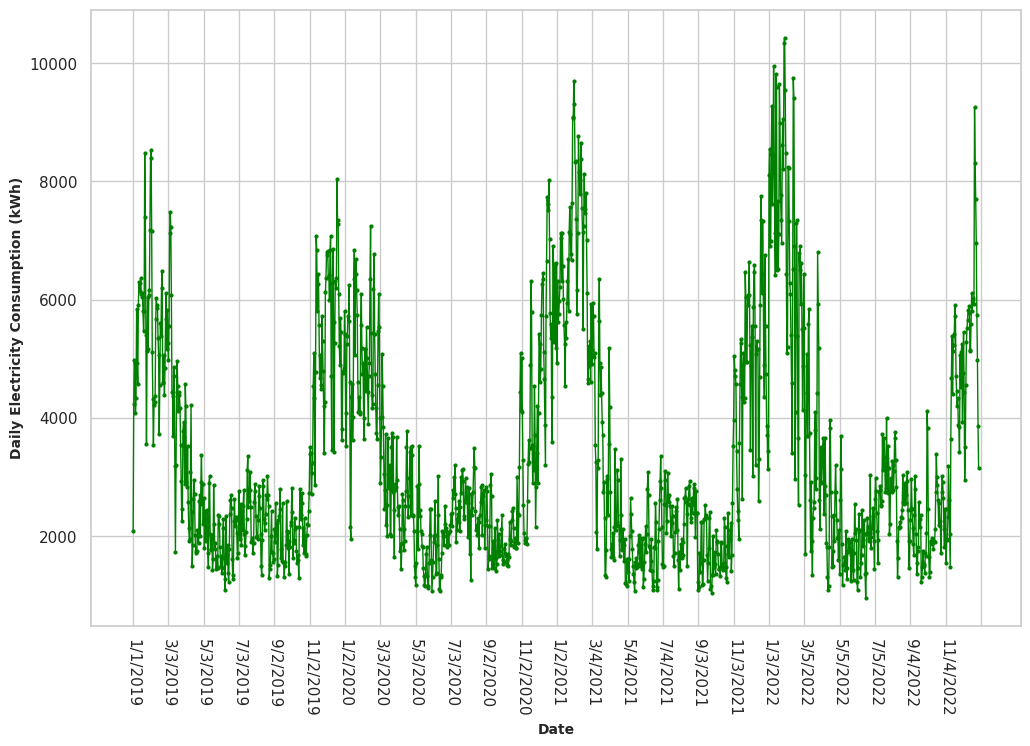

In [ ]:
# Light Data Re-arrangement
b1_daily_pc_arr = np.array(df_daily)
b1_daily_pc_raw = b1_daily_pc_arr[0:1461,0:32]
# print(b1_daily_pc_raw)

b1_hourly_pc_arr = np.array(df_hourly)
b1_hourly_pc_raw = b1_hourly_pc_arr[0:36064,0:25]
# print(b1_hourly_pc_raw)

b1_monthly_pc_arr = np.array(df_monthly)
b1_monthly_pc_raw = b1_monthly_pc_arr[0:72,0:32]
# print(b1_monthly_pc_raw)

# Dataframe Arrangement
b1_daily_plot_df = pd.DataFrame({'datetime': b1_daily_pc_raw[:,0],
                                'EnergyUse': b1_daily_pc_raw[:,6]})

b1_hourly_datetime = pd.DataFrame({'Year': b1_hourly_pc_raw[:,0],
                                  'Month': b1_hourly_pc_raw[:,1],
                                  'Day': b1_hourly_pc_raw[:,2],
                                  'Hour': b1_hourly_pc_raw[:,3],
                                  'EnergyUse': b1_hourly_pc_raw[:,6]})

b1_hourly_datetime['Hour'] = b1_hourly_datetime['Hour'].astype(str)
b1_hourly_datetime['Day'] = b1_hourly_datetime['Day'].astype(str)
b1_hourly_datetime['Month'] = b1_hourly_datetime['Month'].astype(str)
b1_hourly_datetime['Year'] = b1_hourly_datetime['Year'].astype(str)

b1_hourly_datetime['datetime'] = b1_hourly_datetime['Hour'].str.cat([b1_hourly_datetime['Day'], b1_hourly_datetime['Month'], b1_hourly_datetime['Year']], sep='/')

plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
plt.plot(b1_daily_plot_df['datetime'], b1_daily_plot_df['EnergyUse'], color ='green', linewidth=1, marker='o', markersize=2)
plt.xticks(np.arange(0, 1465, 61))
plt.tick_params(axis ='x', rotation = -90)
plt.xlabel('Date', fontweight ='bold', fontsize = 10)
plt.ylabel('Daily Electricity Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.grid(True)
plt.show()

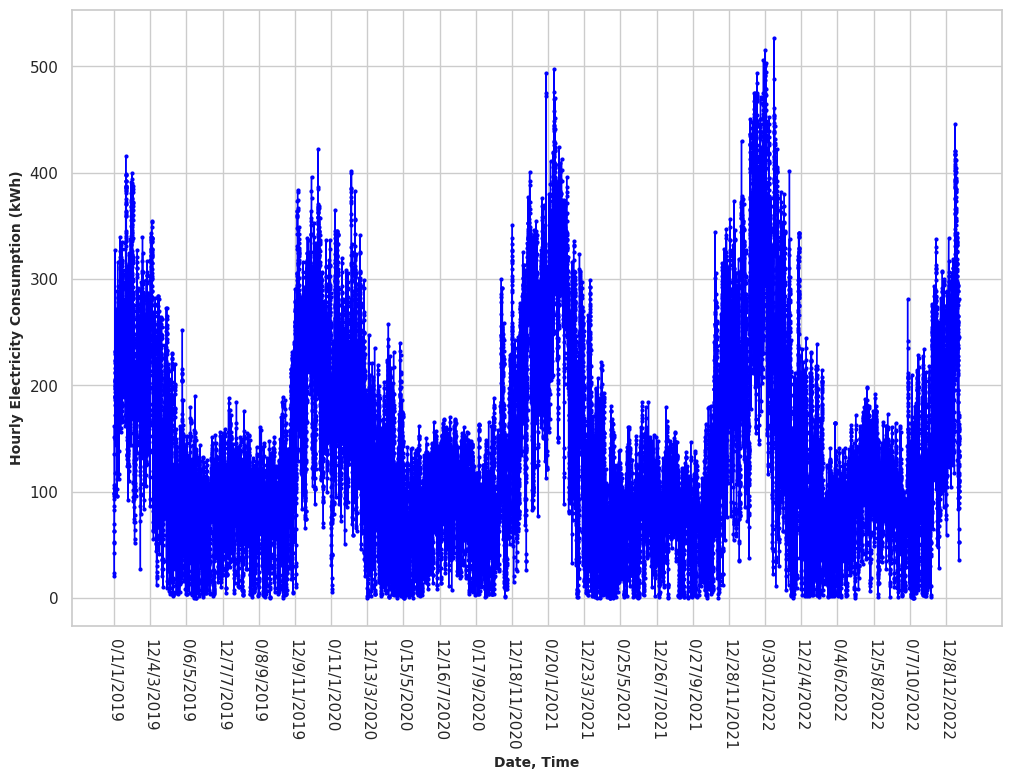

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(b1_hourly_datetime['datetime'], b1_hourly_datetime['EnergyUse'], color ='blue', linewidth=1, marker='o', markersize=2)
plt.xticks(np.arange(0, 35065, 1500))
plt.tick_params(axis ='x', rotation = -90)
plt.xlabel('Date, Time', fontweight ='bold', fontsize = 10)
plt.ylabel('Hourly Electricity Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.grid(True)
plt.show()

# Building 2 Monthly, Daily, Hourly Visualization

Building #2 Visualization:

In [ ]:
# Importing MONTHLY file from GitHub for Monthly Data
url_b2_monthly = 'https://raw.githubusercontent.com/gvanwalsen/adv-weather-norm/main/LV_B2_monthlyrawdata.csv'
df_b2_monthly = pd.read_csv(url_b2_monthly)

b2_monthly_pc_arr = np.array(df_b2_monthly)
b2_monthly_pc_raw = b2_monthly_pc_arr[0:72,0:32]
# print(b2_monthly_pc_raw)

# Importing DAILY file from GitHub
url_b2_daily = 'https://raw.githubusercontent.com/gvanwalsen/adv-weather-norm/main/LV_B2_dailyrawdata.csv'
df_b2_daily = pd.read_csv(url_b2_daily)

# Importing HOURLY file from GitHub
url_b2_hourly = 'https://raw.githubusercontent.com/gvanwalsen/adv-weather-norm/main/LV_B2_hourlyrawdata.csv'
df_b2_hourly = pd.read_csv(url_b2_hourly)

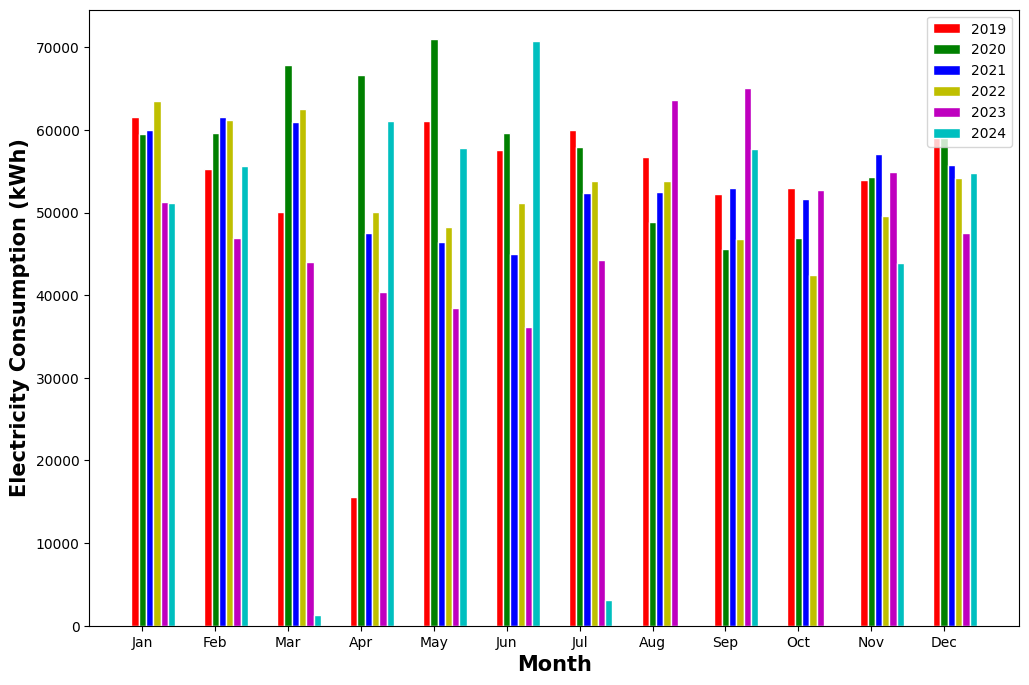

In [ ]:
# Light Data Re-arrangement
b2_monthly_arr = np.array(df_b2_monthly)
b2_monthly_raw = b2_monthly_arr[0:72,0:32]
# print(b2_monthly_raw)

# Establish Baseline Value, Calculated in Different Python Notebook Using Same Dataset
# monthly_baseline_b2 = 123
# b2_monthly_baseline_plot = np.repeat(monthly_baseline_b2, 12)

# Set Up Standard, Year to Year Bar Graph
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

b2_x2019 = np.array(b2_monthly_arr[0:12,3:4])
# print(b2_x2019)
b2_x2020 = np.array(b2_monthly_arr[12:24,3:4])
# print(b2_x2020)
b2_x2021 = np.array(b2_monthly_arr[24:36,3:4])
# print(b2_x2021)
b2_x2022 = np.array(b2_monthly_arr[36:48,3:4])
# print(b2_x2022)
b2_x2023 = np.array(b2_monthly_arr[48:60,3:4])
# print(b2_x2023)
b2_x2024 = np.array(b2_monthly_arr[60:72,3:4])
# print(b2_x2024)

b2_t2019 = b2_x2019.flatten()
b2_t2020 = b2_x2020.flatten()
b2_t2021 = b2_x2021.flatten()
b2_t2022 = b2_x2022.flatten()
b2_t2023 = b2_x2023.flatten()
b2_t2024 = b2_x2024.flatten()

b2_br1 = np.arange(len(b2_x2019))
b2_br2 = [x + barWidth for x in b2_br1]
b2_br3 = [x + barWidth for x in b2_br2]
b2_br4 = [x + barWidth for x in b2_br3]
b2_br5 = [x + barWidth for x in b2_br4]
b2_br6 = [x + barWidth for x in b2_br5]

plt.bar(b2_br1, b2_t2019, color ='r', width = barWidth, edgecolor ='w', label ='2019')
plt.bar(b2_br2, b2_t2020, color ='g', width = barWidth, edgecolor ='w', label ='2020')
plt.bar(b2_br3, b2_t2021, color ='b', width = barWidth, edgecolor ='w', label ='2021')
plt.bar(b2_br4, b2_t2022, color ='y', width = barWidth, edgecolor ='w', label ='2022')
plt.bar(b2_br5, b2_t2023, color ='m', width = barWidth, edgecolor ='w', label ='2023')
plt.bar(b2_br6, b2_t2024, color ='c', width = barWidth, edgecolor ='w', label ='2024')
#plt.plot(br3, monthly_baseline_plot, color ='black', linewidth=4, label='Baseline')

plt.xlabel('Month', fontweight ='bold', fontsize = 15)
plt.ylabel('Electricity Consumption (kWh)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(b2_x2019))],
        ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()
plt.show()

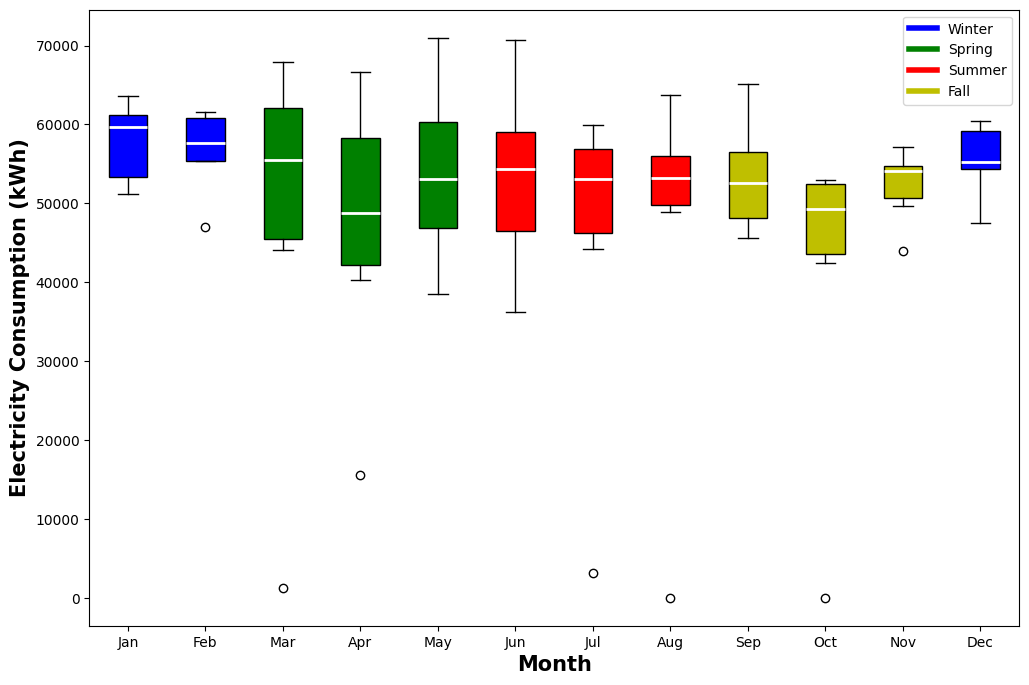

In [ ]:
# Set Up Boxplot Month to Month Plot, Disregard Specific Years of Interest
# Dataframe Arrangement:
b2_monthly_df = pd.DataFrame({'Year': b2_monthly_raw[:,0], 'Month': b2_monthly_raw[:,1], 'Season': b2_monthly_raw[:,2], 'EnergyUse': b2_monthly_raw[:,3]})
# print(b2_monthly_df)

# Seperate Data by Month, Prepare for Boxplotting:
b2_xjan = b2_monthly_df[b2_monthly_df['Month'] == 1]
b2_xjan_arr = np.array(b2_xjan)
b2_xjan_box = b2_xjan_arr[:,3]
# print(b2_xjan_box)

b2_xfeb = b2_monthly_df[b2_monthly_df['Month'] == 2]
b2_xfeb_arr = np.array(b2_xfeb)
b2_xfeb_box = b2_xfeb_arr[:,3]
# print(b2_xfeb_box)

b2_xmar = b2_monthly_df[b2_monthly_df['Month'] == 3]
b2_xmar_arr = np.array(b2_xmar)
b2_xmar_box = b2_xmar_arr[:,3]
# print(b2_xmar_box)

b2_xapr = b2_monthly_df[b2_monthly_df['Month'] == 4]
b2_xapr_arr = np.array(b2_xapr)
b2_xapr_box = b2_xapr_arr[:,3]
# print(b2_xapr_box)

b2_xmay = b2_monthly_df[b2_monthly_df['Month'] == 5]
b2_xmay_arr = np.array(b2_xmay)
b2_xmay_box = b2_xmay_arr[:,3]
# print(b2_xmay_box)

b2_xjun = b2_monthly_df[b2_monthly_df['Month'] == 6]
b2_xjun_arr = np.array(b2_xjun)
b2_xjun_box = b2_xjun_arr[:,3]
# print(b2_xjun_box)

b2_xjul = b2_monthly_df[b2_monthly_df['Month'] == 7]
b2_xjul_arr = np.array(b2_xjul)
b2_xjul_box = b2_xjul_arr[:,3]
# print(b2_xjul_box)

b2_xaug = b2_monthly_df[b2_monthly_df['Month'] == 8]
b2_xaug_arr = np.array(b2_xaug)
b2_xaug_box = b2_xaug_arr[:,3]
# print(b2_xaug_box)

b2_xsep = b2_monthly_df[b2_monthly_df['Month'] == 9]
b2_xsep_arr = np.array(b2_xsep)
b2_xsep_box = b2_xsep_arr[:,3]
# print(b2_xsep_box)

b2_xoct = b2_monthly_df[b2_monthly_df['Month'] == 10]
b2_xoct_arr = np.array(b2_xoct)
b2_xoct_box = b2_xoct_arr[:,3]
# print(b2_xoct_box)

b2_xnov = b2_monthly_df[b2_monthly_df['Month'] == 11]
b2_xnov_arr = np.array(b2_xnov)
b2_xnov_box = b2_xnov_arr[:,3]
# print(b2_xnov_box)

b2_xdec = b2_monthly_df[b2_monthly_df['Month'] == 12]
b2_xdec_arr = np.array(b2_xdec)
b2_xdec_box = b2_xdec_arr[:,3]
# print(b2_xdec_box)

# Set Up Boxplot:
fig = plt.subplots(figsize =(12, 8))
b2_xbox = [b2_xjan_box, b2_xfeb_box, b2_xmar_box, b2_xapr_box, b2_xmay_box, b2_xjun_box, b2_xjul_box, b2_xaug_box, b2_xsep_box, b2_xoct_box, b2_xnov_box, b2_xdec_box]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['b', 'b', 'g', 'g', 'g', 'r', 'r', 'r', 'y', 'y', 'y', 'b']

custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='y', lw=4)]

# Begin actual plot:
bplot = plt.boxplot(b2_xbox, patch_artist = True, tick_labels = labels)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='white', linewidth = 2)

plt.xlabel('Month', fontweight ='bold', fontsize = 15)
plt.ylabel('Electricity Consumption (kWh)', fontweight ='bold', fontsize = 15)
plt.legend(custom_lines, ['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

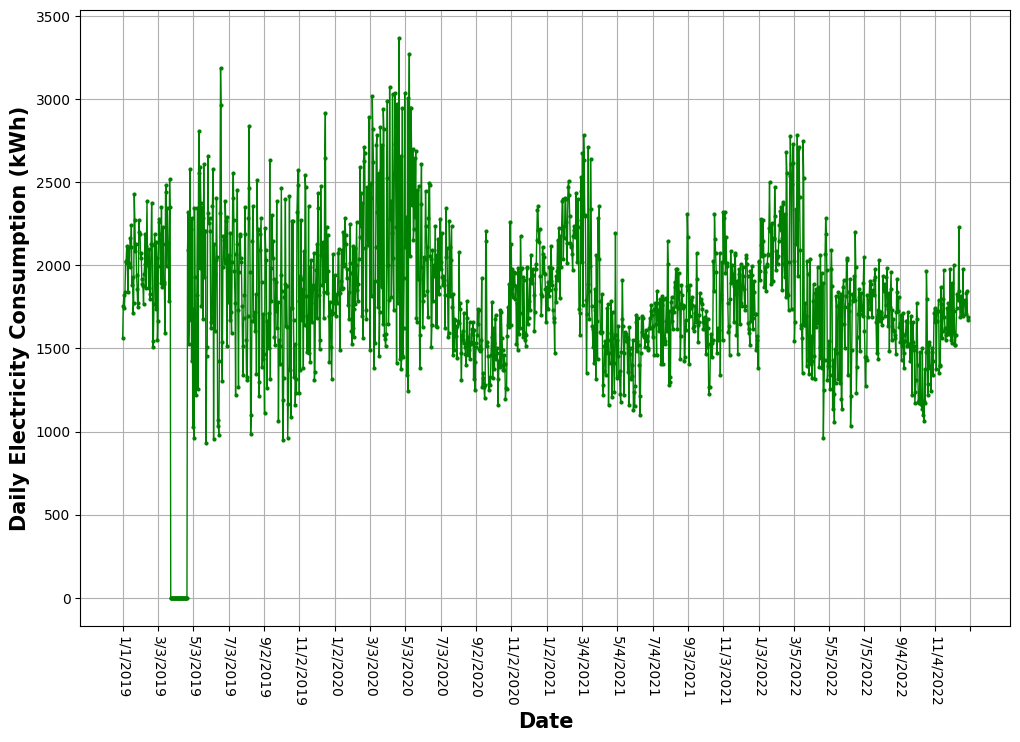

In [ ]:
# Light Data Re-arrangement
b2_daily_pc_arr = np.array(df_b2_daily)
b2_daily_pc_raw = b2_daily_pc_arr[0:1461,0:32]
# print(b2_daily_pc_raw)

b2_hourly_pc_arr = np.array(df_b2_hourly)
b2_hourly_pc_raw = b2_hourly_pc_arr[0:36064,0:27]
# print(b2_hourly_pc_raw)

# Dataframe Arrangement
b2_daily_plot_df = pd.DataFrame({'datetime': b2_daily_pc_raw[:,0],
                                'EnergyUse': b2_daily_pc_raw[:,6]})

b2_hourly_datetime = pd.DataFrame({'Year': b2_hourly_pc_raw[:,0],
                                  'Month': b2_hourly_pc_raw[:,1],
                                  'Day': b2_hourly_pc_raw[:,2],
                                  'Hour': b2_hourly_pc_raw[:,3],
                                  'EnergyUse': b2_hourly_pc_raw[:,8]})

b2_hourly_datetime['Hour'] = b2_hourly_datetime['Hour'].astype(str)
b2_hourly_datetime['Day'] = b2_hourly_datetime['Day'].astype(str)
b2_hourly_datetime['Month'] = b2_hourly_datetime['Month'].astype(str)
b2_hourly_datetime['Year'] = b2_hourly_datetime['Year'].astype(str)

b2_hourly_datetime['datetime'] = b2_hourly_datetime['Hour'].str.cat([b2_hourly_datetime['Day'], b2_hourly_datetime['Month'], b2_hourly_datetime['Year']], sep='/')

plt.figure(figsize=(12, 8))
plt.plot(b2_daily_plot_df['datetime'], b2_daily_plot_df['EnergyUse'], color ='green', linewidth=1, marker='o', markersize=2)
plt.xticks(np.arange(0, 1465, 61))
plt.tick_params(axis ='x', rotation = -90)
plt.xlabel('Date', fontweight ='bold', fontsize = 15)
plt.ylabel('Daily Electricity Consumption (kWh)', fontweight ='bold', fontsize = 15)
plt.grid(True)
plt.show()

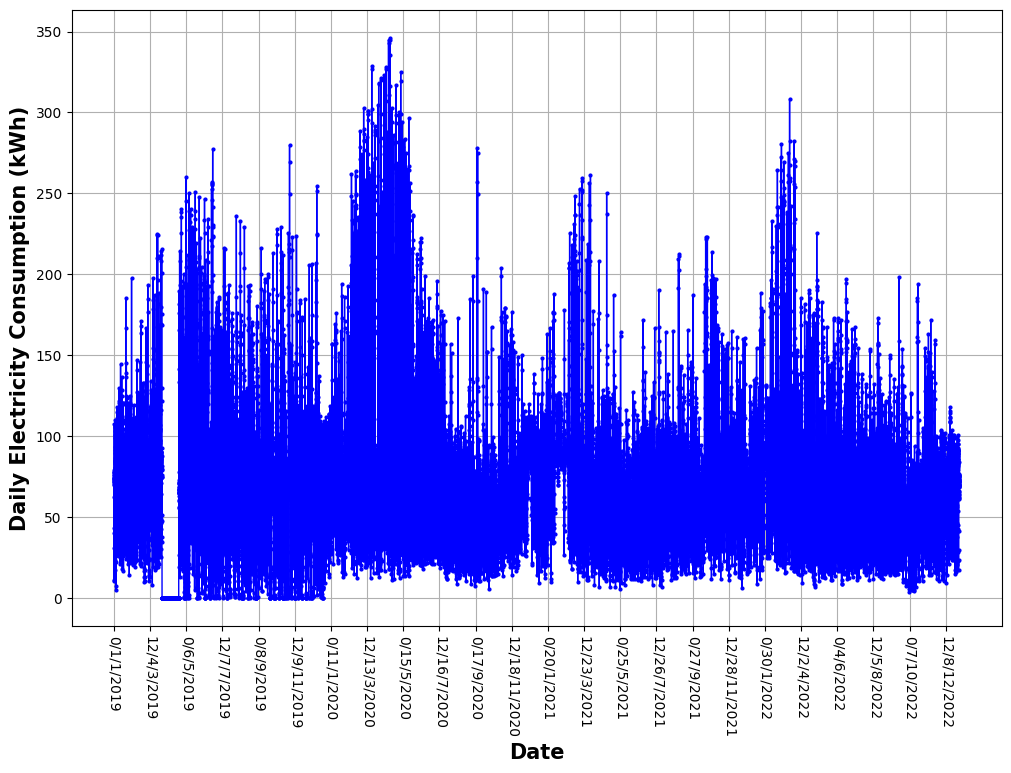

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(b2_hourly_datetime['datetime'], b2_hourly_datetime['EnergyUse'], color ='blue', linewidth=1, marker='o', markersize=2)
plt.xticks(np.arange(0, 35065, 1500))
plt.tick_params(axis ='x', rotation = -90)
plt.xlabel('Date', fontweight ='bold', fontsize = 15)
plt.ylabel('Daily Electricity Consumption (kWh)', fontweight ='bold', fontsize = 15)
plt.grid(True)
plt.show()

# Building 1 Weekly (Hourly) Visuals

**Weekly Trend Visualization Building #1**

Using Daily and Hourly Data

This is not being done for Building #2

In [ ]:
# Light Data Re-arrangement
b1_daily_arr = np.array(df_daily)
b1_daily_raw = b1_daily_arr[0:1461,0:7]
# print(b1_daily_raw)

b1_hourly_arr = np.array(df_hourly)
b1_hourly_raw = b1_hourly_arr[0:36064,0:7]
# print(b1_hourly_raw)

# Dataframe Arrangement
b1_hourly_df = pd.DataFrame({'Year': b1_hourly_raw[:,0], 'Month': b1_hourly_raw[:,1], 'Day': b1_hourly_raw[:,2], 'Hour': b1_hourly_raw[:,3], 'dayofweek': b1_hourly_raw[:,4], 'weekdayend': b1_hourly_raw[:,5], 'EnergyUse': b1_hourly_raw[:,6]})
# print(b1_hourly_df)

# Seperate Data by Day of the Week (MONDAY):
xmon = b1_hourly_df[b1_hourly_df['dayofweek'] == 'Monday']
xmon_arr = np.array(xmon)
# print(xmon)

# Seperate Data by Season (MONDAY):
xmon_winter = xmon[(xmon['Month'] == 1) | (xmon['Month'] == 2) | (xmon['Month'] == 12)]
xmon_winter_avg = xmon_winter.groupby('Hour')['EnergyUse'].mean()
xmon_winter_avg = pd.DataFrame({'Hour': xmon_winter_avg.index, 'EnergyUse': xmon_winter_avg.values})
# print(xmon_winter_avg)

xmon_spring = xmon[(xmon['Month'] == 3) | (xmon['Month'] == 4) | (xmon['Month'] == 5)]
xmon_spring_avg = xmon_spring.groupby('Hour')['EnergyUse'].mean()
xmon_spring_avg = pd.DataFrame({'Hour': xmon_spring_avg.index, 'EnergyUse': xmon_spring_avg.values})
# print(xmon_spring_avg)

xmon_summer = xmon[(xmon['Month'] == 6) | (xmon['Month'] == 7) | (xmon['Month'] == 8)]
xmon_summer_avg = xmon_summer.groupby('Hour')['EnergyUse'].mean()
xmon_summer_avg = pd.DataFrame({'Hour': xmon_summer_avg.index, 'EnergyUse': xmon_summer_avg.values})
# print(xmon_summer_avg)

xmon_fall = xmon[(xmon['Month'] == 9) | (xmon['Month'] == 10) | (xmon['Month'] == 11)]
xmon_fall_avg = xmon_fall.groupby('Hour')['EnergyUse'].mean()
xmon_fall_avg = pd.DataFrame({'Hour': xmon_fall_avg.index, 'EnergyUse': xmon_fall_avg.values})
# print(xmon_fall_avg)


# Seperate Data by Day of Week (TUESDAY):
xtue = b1_hourly_df[b1_hourly_df['dayofweek'] == 'Tuesday']
xtue_arr = np.array(xtue)
# print(xtue)

# Seperate Data by Season (Tuesday):
xtue_winter = xtue[(xtue['Month'] == 1) | (xtue['Month'] == 2) | (xtue['Month'] == 12)]
xtue_winter_avg = xtue_winter.groupby('Hour')['EnergyUse'].mean()
xtue_winter_avg = pd.DataFrame({'Hour': xtue_winter_avg.index, 'EnergyUse': xtue_winter_avg.values})
# print(xtue_winter_avg)

xtue_spring = xtue[(xtue['Month'] == 3) | (xtue['Month'] == 4) | (xtue['Month'] == 5)]
xtue_spring_avg = xtue_spring.groupby('Hour')['EnergyUse'].mean()
xtue_spring_avg = pd.DataFrame({'Hour': xtue_spring_avg.index, 'EnergyUse': xtue_spring_avg.values})
# print(xtue_spring_avg)

xtue_summer = xtue[(xtue['Month'] == 6) | (xtue['Month'] == 7) | (xtue['Month'] == 8)]
xtue_summer_avg = xtue_summer.groupby('Hour')['EnergyUse'].mean()
xtue_summer_avg = pd.DataFrame({'Hour': xtue_summer_avg.index, 'EnergyUse': xtue_summer_avg.values})
# print(xtue_summer_avg)

xtue_fall = xtue[(xtue['Month'] == 9) | (xtue['Month'] == 10) | (xtue['Month'] == 11)]
xtue_fall_avg = xtue_fall.groupby('Hour')['EnergyUse'].mean()
xtue_fall_avg = pd.DataFrame({'Hour': xtue_fall_avg.index, 'EnergyUse': xtue_fall_avg.values})
# print(xtue_fall_avg)


# Seperate Data by Day of the Week (WEDNESDAY):
xwed = b1_hourly_df[b1_hourly_df['dayofweek'] == 'Wednesday']
xwed_arr = np.array(xwed)
# print(xwed)

# Seperate Data by Season (WEDNESDAY):
xwed_winter = xwed[(xwed['Month'] == 1) | (xwed['Month'] == 2) | (xwed['Month'] == 12)]
xwed_winter_avg = xwed_winter.groupby('Hour')['EnergyUse'].mean()
xwed_winter_avg = pd.DataFrame({'Hour': xwed_winter_avg.index, 'EnergyUse': xwed_winter_avg.values})

xwed_spring = xwed[(xwed['Month'] == 3) | (xwed['Month'] == 4) | (xwed['Month'] == 5)]
xwed_spring_avg = xwed_spring.groupby('Hour')['EnergyUse'].mean()
xwed_spring_avg = pd.DataFrame({'Hour': xwed_spring_avg.index, 'EnergyUse': xwed_spring_avg.values})

xwed_summer = xwed[(xwed['Month'] == 6) | (xwed['Month'] == 7) | (xwed['Month'] == 8)]
xwed_summer_avg = xwed_summer.groupby('Hour')['EnergyUse'].mean()
xwed_summer_avg = pd.DataFrame({'Hour': xwed_summer_avg.index, 'EnergyUse': xwed_summer_avg.values})

xwed_fall = xwed[(xwed['Month'] == 9) | (xwed['Month'] == 10) | (xwed['Month'] == 11)]
xwed_fall_avg = xwed_fall.groupby('Hour')['EnergyUse'].mean()
xwed_fall_avg = pd.DataFrame({'Hour': xwed_fall_avg.index, 'EnergyUse': xwed_fall_avg.values})


# Seperate Data by Day of the Week (THURSDAY):
xthu = b1_hourly_df[b1_hourly_df['dayofweek'] == 'Thursday']
xthu_arr = np.array(xthu)

# Seperate Data by Season (THURSDAY):
xthu_winter = xthu[(xthu['Month'] == 1) | (xthu['Month'] == 2) | (xthu['Month'] == 12)]
xthu_winter_avg = xthu_winter.groupby('Hour')['EnergyUse'].mean()
xthu_winter_avg = pd.DataFrame({'Hour': xthu_winter_avg.index, 'EnergyUse': xthu_winter_avg.values})

xthu_spring = xthu[(xthu['Month'] == 3) | (xthu['Month'] == 4) | (xthu['Month'] == 5)]
xthu_spring_avg = xthu_spring.groupby('Hour')['EnergyUse'].mean()
xthu_spring_avg = pd.DataFrame({'Hour': xthu_spring_avg.index, 'EnergyUse': xthu_spring_avg.values})

xthu_summer = xthu[(xthu['Month'] == 6) | (xthu['Month'] == 7) | (xthu['Month'] == 8)]
xthu_summer_avg = xthu_summer.groupby('Hour')['EnergyUse'].mean()
xthu_summer_avg = pd.DataFrame({'Hour': xthu_summer_avg.index, 'EnergyUse': xthu_summer_avg.values})

xthu_fall = xthu[(xthu['Month'] == 9) | (xthu['Month'] == 10) | (xthu['Month'] == 11)]
xthu_fall_avg = xthu_fall.groupby('Hour')['EnergyUse'].mean()
xthu_fall_avg = pd.DataFrame({'Hour': xthu_fall_avg.index, 'EnergyUse': xthu_fall_avg.values})


# Seperate Data by Day of the Week (FRIDAY):
xfri = b1_hourly_df[b1_hourly_df['dayofweek'] == 'Friday']
xfri_arr = np.array(xfri)

# Seperate Data by Season (FRIDAY):
xfri_winter = xfri[(xfri['Month'] == 1) | (xfri['Month'] == 2) | (xfri['Month'] == 12)]
xfri_winter_avg = xfri_winter.groupby('Hour')['EnergyUse'].mean()
xfri_winter_avg = pd.DataFrame({'Hour': xfri_winter_avg.index, 'EnergyUse': xfri_winter_avg.values})

xfri_spring = xfri[(xfri['Month'] == 3) | (xfri['Month'] == 4) | (xfri['Month'] == 5)]
xfri_spring_avg = xfri_spring.groupby('Hour')['EnergyUse'].mean()
xfri_spring_avg = pd.DataFrame({'Hour': xfri_spring_avg.index, 'EnergyUse': xfri_spring_avg.values})

xfri_summer = xfri[(xfri['Month'] == 6) | (xfri['Month'] == 7) | (xfri['Month'] == 8)]
xfri_summer_avg = xfri_summer.groupby('Hour')['EnergyUse'].mean()
xfri_summer_avg = pd.DataFrame({'Hour': xfri_summer_avg.index, 'EnergyUse': xfri_summer_avg.values})

xfri_fall = xfri[(xfri['Month'] == 9) | (xfri['Month'] == 10) | (xfri['Month'] == 11)]
xfri_fall_avg = xfri_fall.groupby('Hour')['EnergyUse'].mean()
xfri_fall_avg = pd.DataFrame({'Hour': xfri_fall_avg.index, 'EnergyUse': xfri_fall_avg.values})


# Seperate Data by Day of the Week (SATURDAY):
xsat = b1_hourly_df[b1_hourly_df['dayofweek'] == 'Saturday']
xsat_arr = np.array(xsat)

# Seperate Data by Season (SATURDAY):
xsat_winter = xsat[(xsat['Month'] == 1) | (xsat['Month'] == 2) | (xsat['Month'] == 12)]
xsat_winter_avg = xsat_winter.groupby('Hour')['EnergyUse'].mean()
xsat_winter_avg = pd.DataFrame({'Hour': xsat_winter_avg.index, 'EnergyUse': xsat_winter_avg.values})

xsat_spring = xsat[(xsat['Month'] == 3) | (xsat['Month'] == 4) | (xsat['Month'] == 5)]
xsat_spring_avg = xsat_spring.groupby('Hour')['EnergyUse'].mean()
xsat_spring_avg = pd.DataFrame({'Hour': xsat_spring_avg.index, 'EnergyUse': xsat_spring_avg.values})

xsat_summer = xsat[(xsat['Month'] == 6) | (xsat['Month'] == 7) | (xsat['Month'] == 8)]
xsat_summer_avg = xsat_summer.groupby('Hour')['EnergyUse'].mean()
xsat_summer_avg = pd.DataFrame({'Hour': xsat_summer_avg.index, 'EnergyUse': xsat_summer_avg.values})

xsat_fall = xsat[(xsat['Month'] == 9) | (xsat['Month'] == 10) | (xsat['Month'] == 11)]
xsat_fall_avg = xsat_fall.groupby('Hour')['EnergyUse'].mean()
xsat_fall_avg = pd.DataFrame({'Hour': xsat_fall_avg.index, 'EnergyUse': xsat_fall_avg.values})


# Seperate Data by Day of the Week (SUNDAY):
xsun = b1_hourly_df[b1_hourly_df['dayofweek'] == 'Sunday']
xsun_arr = np.array(xsun)

# Seperate Data by Season (SUNDAY):
xsun_winter = xsun[(xsun['Month'] == 1) | (xsun['Month'] == 2) | (xsun['Month'] == 12)]
xsun_winter_avg = xsun_winter.groupby('Hour')['EnergyUse'].mean()
xsun_winter_avg = pd.DataFrame({'Hour': xsun_winter_avg.index, 'EnergyUse': xsun_winter_avg.values})

xsun_spring = xsun[(xsun['Month'] == 3) | (xsun['Month'] == 4) | (xsun['Month'] == 5)]
xsun_spring_avg = xsun_spring.groupby('Hour')['EnergyUse'].mean()
xsun_spring_avg = pd.DataFrame({'Hour': xsun_spring_avg.index, 'EnergyUse': xsun_spring_avg.values})

xsun_summer = xsun[(xsun['Month'] == 6) | (xsun['Month'] == 7) | (xsun['Month'] == 8)]
xsun_summer_avg = xsun_summer.groupby('Hour')['EnergyUse'].mean()
xsun_summer_avg = pd.DataFrame({'Hour': xsun_summer_avg.index, 'EnergyUse': xsun_summer_avg.values})

xsun_fall = xsun[(xsun['Month'] == 9) | (xsun['Month'] == 10) | (xsun['Month'] == 11)]
xsun_fall_avg = xsun_fall.groupby('Hour')['EnergyUse'].mean()
xsun_fall_avg = pd.DataFrame({'Hour': xsun_fall_avg.index, 'EnergyUse': xsun_fall_avg.values})


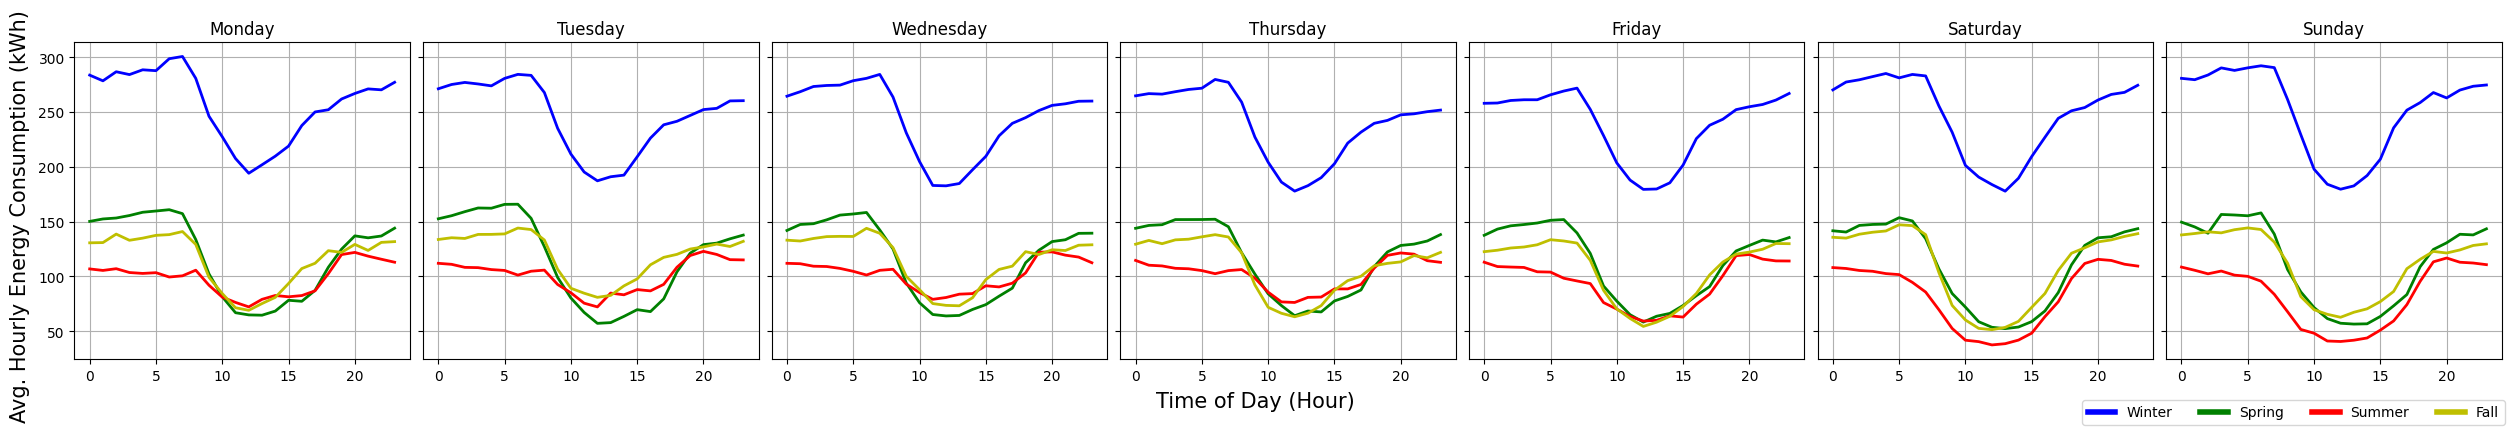

In [ ]:
# Plot it all together:
figure,  (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharex=True, sharey=True, constrained_layout=True, figsize=(25, 4))
ax1.plot(xmon_winter_avg['Hour'], xmon_winter_avg['EnergyUse'], color ='b', linewidth=2, label='Winter')
ax1.plot(xmon_spring_avg['Hour'], xmon_spring_avg['EnergyUse'], color ='g', linewidth=2, label='Spring')
ax1.plot(xmon_summer_avg['Hour'], xmon_summer_avg['EnergyUse'], color ='r', linewidth=2, label='Summer')
ax1.plot(xmon_fall_avg['Hour'], xmon_fall_avg['EnergyUse'], color ='y', linewidth=2, label='Fall')
ax1.set_title("Monday")
ax1.grid(True)

ax2.plot(xtue_winter_avg['Hour'], xtue_winter_avg['EnergyUse'], color ='b', linewidth=2, label='Winter')
ax2.plot(xtue_spring_avg['Hour'], xtue_spring_avg['EnergyUse'], color ='g', linewidth=2, label='Spring')
ax2.plot(xtue_summer_avg['Hour'], xtue_summer_avg['EnergyUse'], color ='r', linewidth=2, label='Summer')
ax2.plot(xtue_fall_avg['Hour'], xtue_fall_avg['EnergyUse'], color ='y', linewidth=2, label='Fall')
ax2.set_title("Tuesday")
ax2.grid(True)

ax3.plot(xwed_winter_avg['Hour'], xwed_winter_avg['EnergyUse'], color ='b', linewidth=2, label='Winter')
ax3.plot(xwed_spring_avg['Hour'], xwed_spring_avg['EnergyUse'], color ='g', linewidth=2, label='Spring')
ax3.plot(xwed_summer_avg['Hour'], xwed_summer_avg['EnergyUse'], color ='r', linewidth=2, label='Summer')
ax3.plot(xwed_fall_avg['Hour'], xwed_fall_avg['EnergyUse'], color ='y', linewidth=2, label='Fall')
ax3.set_title("Wednesday")
ax3.grid(True)

ax4.plot(xthu_winter_avg['Hour'], xthu_winter_avg['EnergyUse'], color ='b', linewidth=2, label='Winter')
ax4.plot(xthu_spring_avg['Hour'], xthu_spring_avg['EnergyUse'], color ='g', linewidth=2, label='Spring')
ax4.plot(xthu_summer_avg['Hour'], xthu_summer_avg['EnergyUse'], color ='r', linewidth=2, label='Summer')
ax4.plot(xthu_fall_avg['Hour'], xthu_fall_avg['EnergyUse'], color ='y', linewidth=2, label='Fall')
ax4.set_title("Thursday")
ax4.grid(True)

ax5.plot(xfri_winter_avg['Hour'], xfri_winter_avg['EnergyUse'], color ='b', linewidth=2, label='Winter')
ax5.plot(xfri_spring_avg['Hour'], xfri_spring_avg['EnergyUse'], color ='g', linewidth=2, label='Spring')
ax5.plot(xfri_summer_avg['Hour'], xfri_summer_avg['EnergyUse'], color ='r', linewidth=2, label='Summer')
ax5.plot(xfri_fall_avg['Hour'], xfri_fall_avg['EnergyUse'], color ='y', linewidth=2, label='Fall')
ax5.set_title("Friday")
ax5.grid(True)

ax6.plot(xsat_winter_avg['Hour'], xsat_winter_avg['EnergyUse'], color ='b', linewidth=2, label='Winter')
ax6.plot(xsat_spring_avg['Hour'], xsat_spring_avg['EnergyUse'], color ='g', linewidth=2, label='Spring')
ax6.plot(xsat_summer_avg['Hour'], xsat_summer_avg['EnergyUse'], color ='r', linewidth=2, label='Summer')
ax6.plot(xsat_fall_avg['Hour'], xsat_fall_avg['EnergyUse'], color ='y', linewidth=2, label='Fall')
ax6.set_title("Saturday")
ax6.grid(True)

ax7.plot(xsun_winter_avg['Hour'], xsun_winter_avg['EnergyUse'], color ='b', linewidth=2, label='Winter')
ax7.plot(xsun_spring_avg['Hour'], xsun_spring_avg['EnergyUse'], color ='g', linewidth=2, label='Spring')
ax7.plot(xsun_summer_avg['Hour'], xsun_summer_avg['EnergyUse'], color ='r', linewidth=2, label='Summer')
ax7.plot(xsun_fall_avg['Hour'], xsun_fall_avg['EnergyUse'], color ='y', linewidth=2, label='Fall')
ax7.set_title("Sunday")
ax7.grid(True)

figure.supxlabel('Time of Day (Hour)', fontsize=15)
figure.supylabel('Avg. Hourly Energy Consumption (kWh)', fontsize=15)
figure.legend(custom_lines, ['Winter', 'Spring', 'Summer', 'Fall'], loc='lower right', ncol=4)
plt.show()

# Building 1 Pearson

**Pearson Correlation Coefficient Calculation**

In [ ]:
# This refrences and uses dataframes set up in the "Monthly Data Visualization" Section

# Dataframe Arrangement for Pearson CCC
b1_daily_pc_df = pd.DataFrame({ 'Month': b1_daily_pc_raw[:,2],
                                'EnergyUse': b1_daily_pc_raw[:,6],
                                'Temp': b1_daily_pc_raw[:,9],
                                'feelslike': b1_daily_pc_raw[:,12],
                                'RelHum': b1_daily_pc_raw[:,13],
                                'Humidity': b1_daily_pc_raw[:,14],
                                'Precip': b1_daily_pc_raw[:,15],
                                'Snow': b1_daily_pc_raw[:,19],
                                'WindGust': b1_daily_pc_raw[:,21],
                                'WindSpeed': b1_daily_pc_raw[:,22],
                                'WindDir': b1_daily_pc_raw[:,23],
                                'SeaLevelPressure': b1_daily_pc_raw[:,24],
                                'CloudCover': b1_daily_pc_raw[:,25],
                                'Visibility': b1_daily_pc_raw[:,26],
                                'SolarRadiation': b1_daily_pc_raw[:,27],
                                'SolarEnergy': b1_daily_pc_raw[:,28],
                                'UVIndex': b1_daily_pc_raw[:,29]})

b1_hourly_pc_df = pd.DataFrame({'Month': b1_hourly_pc_raw[:,1],
                                'EnergyUse': b1_hourly_pc_raw[:,6],
                                'Temp': b1_hourly_pc_raw[:,7],
                                'feelslike': b1_hourly_pc_raw[:,8],
                                'RelHum': b1_hourly_pc_raw[:,9],
                                'Humidity': b1_hourly_pc_raw[:,10],
                                'Precip': b1_hourly_pc_raw[:,11],
                                'Snow': b1_hourly_pc_raw[:,14],
                                'WindGust': b1_hourly_pc_raw[:,16],
                                'WindSpeed': b1_hourly_pc_raw[:,17],
                                'WindDir': b1_hourly_pc_raw[:,18],
                                'SeaLevelPressure': b1_hourly_pc_raw[:,19],
                                'CloudCover': b1_hourly_pc_raw[:,20],
                                'Visibility': b1_hourly_pc_raw[:,21],
                                'SolarRadiation': b1_hourly_pc_raw[:,22],
                                'SolarEnergy': b1_hourly_pc_raw[:,23],
                                'UVIndex': b1_hourly_pc_raw[:,24]})

b1_monthly_pc_df = pd.DataFrame({'Month': b1_monthly_pc_raw[:,1],
                                'EnergyUse': b1_monthly_pc_raw[:,3],
                                'Temp': b1_monthly_pc_raw[:,6],
                                'feelslike': b1_monthly_pc_raw[:,9],
                                'RelHum': b1_monthly_pc_raw[:,10],
                                'Humidity': b1_monthly_pc_raw[:,11],
                                'Precip': b1_monthly_pc_raw[:,12],
                                'Snow': b1_monthly_pc_raw[:,16],
                                'WindGust': b1_monthly_pc_raw[:,18],
                                'WindSpeed': b1_monthly_pc_raw[:,19],
                                'WindDir': b1_monthly_pc_raw[:,20],
                                'SeaLevelPressure': b1_monthly_pc_raw[:,21],
                                'CloudCover': b1_monthly_pc_raw[:,22],
                                'Visibility': b1_monthly_pc_raw[:,23],
                                'SolarRadiation': b1_monthly_pc_raw[:,24],
                                'SolarEnergy': b1_monthly_pc_raw[:,25],
                                'UVIndex': b1_monthly_pc_raw[:,26]})


# Seperate Data by Season (DAILY)
b1_daily_winter = b1_daily_pc_df[(b1_daily_pc_df['Month'] == 1) | (b1_daily_pc_df['Month'] == 2) | (b1_daily_pc_df['Month'] == 12)]
# print(b1_daily_winter)

b1_daily_spring = b1_daily_pc_df[(b1_daily_pc_df['Month'] == 3) | (b1_daily_pc_df['Month'] == 4) | (b1_daily_pc_df['Month'] == 5)]
# print(b1_daily_spring)

b1_daily_summer = b1_daily_pc_df[(b1_daily_pc_df['Month'] == 6) | (b1_daily_pc_df['Month'] == 7) | (b1_daily_pc_df['Month'] == 8)]
# print(b1_daily_summer)

b1_daily_fall = b1_daily_pc_df[(b1_daily_pc_df['Month'] == 9) | (b1_daily_pc_df['Month'] == 10) | (b1_daily_pc_df['Month'] == 11)]
# print(b1_daily_fall)

# Seperate Data by Season (HOURLY)
b1_hourly_winter = b1_hourly_pc_df[(b1_hourly_pc_df['Month'] == 1) | (b1_hourly_pc_df['Month'] == 2) | (b1_hourly_pc_df['Month'] == 12)]
# print(b1_hourly_winter)

b1_hourly_spring = b1_hourly_pc_df[(b1_hourly_pc_df['Month'] == 3) | (b1_hourly_pc_df['Month'] == 4) | (b1_hourly_pc_df['Month'] == 5)]
# print(b1_hourly_spring)

b1_hourly_summer = b1_hourly_pc_df[(b1_hourly_pc_df['Month'] == 6) | (b1_hourly_pc_df['Month'] == 7) | (b1_hourly_pc_df['Month'] == 8)]
# print(b1_hourly_summer)

b1_hourly_fall = b1_hourly_pc_df[(b1_hourly_pc_df['Month'] == 9) | (b1_hourly_pc_df['Month'] == 10) | (b1_hourly_pc_df['Month'] == 11)]
# print(b1_hourly_fall)

# Seperate Date by Season (MONTHLY)
b1_monthly_winter = b1_monthly_pc_df[(b1_monthly_pc_df['Month'] == 1) | (b1_monthly_pc_df['Month'] == 2) | (b1_monthly_pc_df['Month'] == 12)]
# print(b1_monthly_winter)

b1_monthly_spring = b1_monthly_pc_df[(b1_monthly_pc_df['Month'] == 3) | (b1_monthly_pc_df['Month'] == 4) | (b1_monthly_pc_df['Month'] == 5)]
# print(b1_monthly_spring)

b1_monthly_summer = b1_monthly_pc_df[(b1_monthly_pc_df['Month'] == 6) | (b1_monthly_pc_df['Month'] == 7) | (b1_monthly_pc_df['Month'] == 8)]
# print(b1_monthly_summer)

b1_monthly_fall = b1_monthly_pc_df[(b1_monthly_pc_df['Month'] == 9) | (b1_monthly_pc_df['Month'] == 10) | (b1_monthly_pc_df['Month'] == 11)]
# print(b1_monthly_fall)

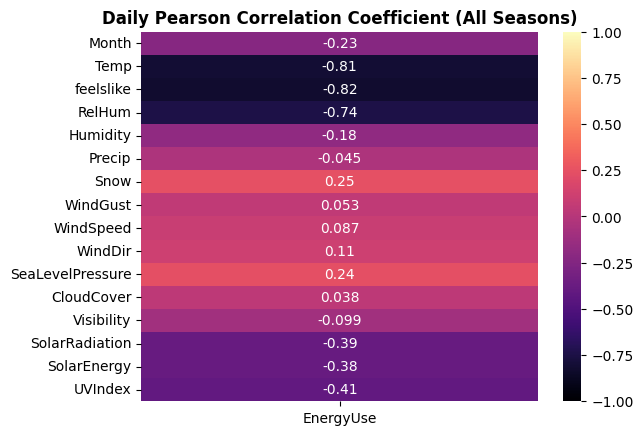

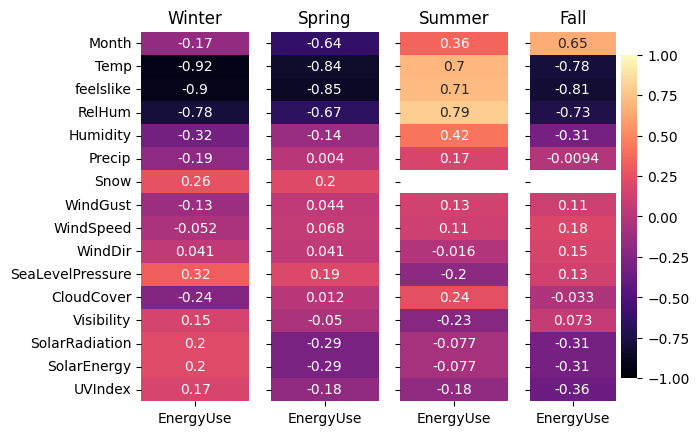

In [ ]:
# Pearson Corellation (Daily)
# All Seasons
b1_daily_all_pearson = b1_daily_pc_df.corr(method='pearson')
b1_daily_all_pearson = b1_daily_all_pearson[['EnergyUse']].drop('EnergyUse')

b1all = sns.heatmap(b1_daily_all_pearson, annot=True, cmap='magma', vmin=-1, vmax=1)
b1all.set_title('Daily Pearson Correlation Coefficient (All Seasons)', fontweight='bold')
plt.show()

# Winter
b1_daily_winter_pearson = b1_daily_winter.corr(method='pearson')
b1_daily_winter_ener_pearson = b1_daily_winter_pearson[['EnergyUse']].drop('EnergyUse')

'''
b1win = sns.heatmap(b1_daily_winter_ener_pearson, annot=True, cmap='magma', vmin=-1, vmax=1)
b1win.set_title('Daily Pearson Correlation Coefficient (Winter)', fontweight='bold')
plt.show()
'''

# Spring
b1_daily_spring_pearson = b1_daily_spring.corr(method='pearson')
b1_daily_spring_ener_pearson = b1_daily_spring_pearson[['EnergyUse']].drop('EnergyUse')

'''
b1spr = sns.heatmap(b1_daily_spring_ener_pearson, annot=True, cmap='magma', vmin=-1, vmax=1)
b1spr.set_title('Daily Pearson Correlation Coefficient (Spring)', fontweight='bold')
plt.show()
'''

# Summer
b1_daily_summer_pearson = b1_daily_summer.corr(method='pearson')
b1_daily_summer_ener_pearson = b1_daily_summer_pearson[['EnergyUse']].drop('EnergyUse')
'''
b1sum = sns.heatmap(b1_daily_summer_ener_pearson, annot=True, cmap='magma', vmin=-1, vmax=1)
b1sum.set_title('Daily Pearson Correlation Coefficient (Summer)', fontweight='bold')
plt.show()
'''

# Fall
b1_daily_fall_pearson = b1_daily_fall.corr(method='pearson')
b1_daily_fall_ener_pearson = b1_daily_fall_pearson[['EnergyUse']].drop('EnergyUse')
'''
b1fal = sns.heatmap(b1_daily_fall_ener_pearson, annot=True, cmap='magma', vmin=-1, vmax=1)
b1fal.set_title('Daily Pearson Correlation Coefficient (Fall)', fontweight='bold')
plt.show()
'''

f,  (pc_b1_win, pc_b1_spr, pc_b1_sum, pc_b1_fal) = plt.subplots(1, 4, sharey=True)
#f.suptitle('Daily Pearson Correlation Coefficient (Individual Seasons)', fontweight='bold')
g1 = sns.heatmap(b1_daily_winter_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b1_win)
pc_b1_win.set_title('Winter')

g2 = sns.heatmap(b1_daily_spring_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b1_spr)
pc_b1_spr.set_title('Spring')

g3 = sns.heatmap(b1_daily_summer_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b1_sum)
pc_b1_sum.set_title('Summer')

g4 = sns.heatmap(b1_daily_fall_ener_pearson, annot=True, cmap='magma', vmin=-1, vmax=1, ax=pc_b1_fal)
pc_b1_fal.set_title('Fall')
plt.show()

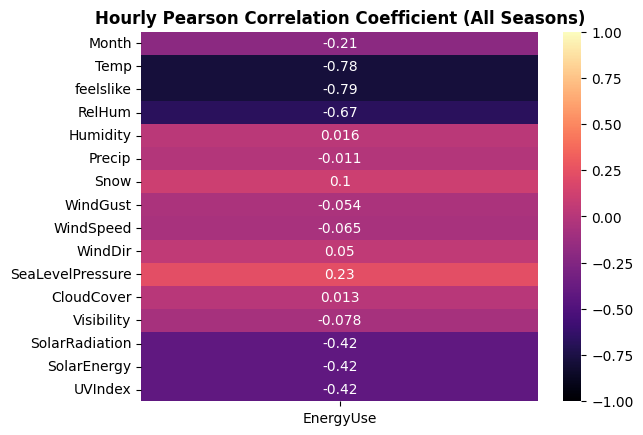

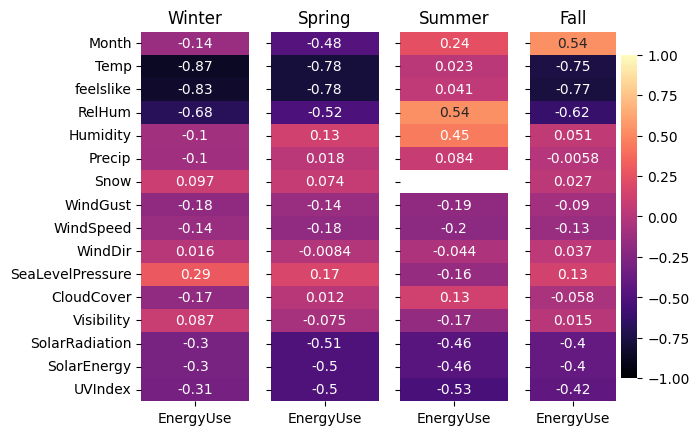

In [ ]:
# Pearson Corellation (Hourly)
# All Seasons
b1_hourly_all_pearson = b1_hourly_pc_df.corr(method='pearson')
b1_hourly_all_pearson = b1_hourly_all_pearson[['EnergyUse']].drop('EnergyUse')

b1all_hourly = sns.heatmap(b1_hourly_all_pearson, annot=True, cmap='magma', vmin=-1, vmax=1)
b1all_hourly.set_title('Hourly Pearson Correlation Coefficient (All Seasons)', fontweight='bold')
plt.show()

# Winter
b1_hourly_winter_pearson = b1_hourly_winter.corr(method='pearson')
b1_hourly_winter_ener_pearson = b1_hourly_winter_pearson[['EnergyUse']].drop('EnergyUse')

# Spring
b1_hourly_spring_pearson = b1_hourly_spring.corr(method='pearson')
b1_hourly_spring_ener_pearson = b1_hourly_spring_pearson[['EnergyUse']].drop('EnergyUse')

# Summer
b1_hourly_summer_pearson = b1_hourly_summer.corr(method='pearson')
b1_hourly_summer_ener_pearson = b1_hourly_summer_pearson[['EnergyUse']].drop('EnergyUse')

# Fall
b1_hourly_fall_pearson = b1_hourly_fall.corr(method='pearson')
b1_hourly_fall_ener_pearson = b1_hourly_fall_pearson[['EnergyUse']].drop('EnergyUse')

f,  (pc_b1_win, pc_b1_spr, pc_b1_sum, pc_b1_fal) = plt.subplots(1, 4, sharey=True)
#f.suptitle('Daily Pearson Correlation Coefficient (Individual Seasons)', fontweight='bold')
g1 = sns.heatmap(b1_hourly_winter_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b1_win)
pc_b1_win.set_title('Winter')

g2 = sns.heatmap(b1_hourly_spring_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b1_spr)
pc_b1_spr.set_title('Spring')

g3 = sns.heatmap(b1_hourly_summer_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b1_sum)
pc_b1_sum.set_title('Summer')

g4 = sns.heatmap(b1_hourly_fall_ener_pearson, annot=True, cmap='magma', vmin=-1, vmax=1, ax=pc_b1_fal)
pc_b1_fal.set_title('Fall')
plt.show()

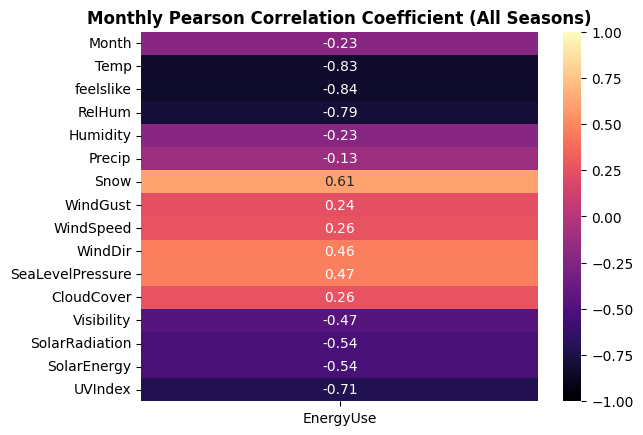

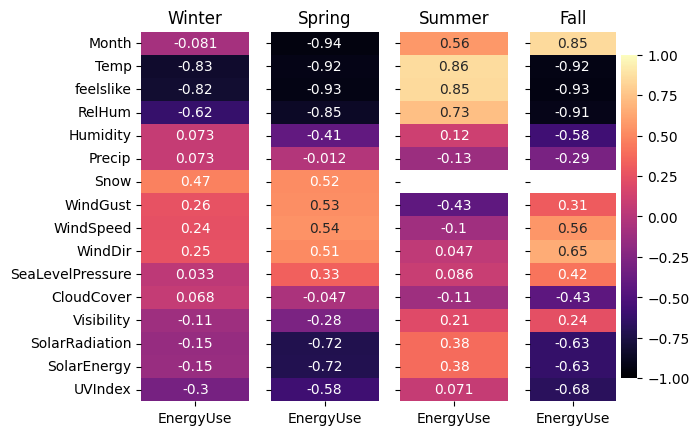

In [ ]:
# Pearson Corellation (Monthly)
# All Seasons
b1_monthly_all_pearson = b1_monthly_pc_df.corr(method='pearson')
b1_monthly_all_pearson = b1_monthly_all_pearson[['EnergyUse']].drop('EnergyUse')

b1all_monthly = sns.heatmap(b1_monthly_all_pearson, annot=True, cmap='magma', vmin=-1, vmax=1)
b1all_monthly.set_title('Monthly Pearson Correlation Coefficient (All Seasons)', fontweight='bold')
plt.show()

# Winter
b1_monthly_winter_pearson = b1_monthly_winter.corr(method='pearson')
b1_monthly_winter_ener_pearson = b1_monthly_winter_pearson[['EnergyUse']].drop('EnergyUse')

# Spring
b1_monthly_spring_pearson = b1_monthly_spring.corr(method='pearson')
b1_monthly_spring_ener_pearson = b1_monthly_spring_pearson[['EnergyUse']].drop('EnergyUse')

# Summer
b1_monthly_summer_pearson = b1_monthly_summer.corr(method='pearson')
b1_monthly_summer_ener_pearson = b1_monthly_summer_pearson[['EnergyUse']].drop('EnergyUse')

# Fall
b1_monthly_fall_pearson = b1_monthly_fall.corr(method='pearson')
b1_monthly_fall_ener_pearson = b1_monthly_fall_pearson[['EnergyUse']].drop('EnergyUse')

f,  (pc_b1_win, pc_b1_spr, pc_b1_sum, pc_b1_fal) = plt.subplots(1, 4, sharey=True)
#f.suptitle('Daily Pearson Correlation Coefficient (Individual Seasons)', fontweight='bold')
g1 = sns.heatmap(b1_monthly_winter_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b1_win)
pc_b1_win.set_title('Winter')

g2 = sns.heatmap(b1_monthly_spring_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b1_spr)
pc_b1_spr.set_title('Spring')

g3 = sns.heatmap(b1_monthly_summer_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b1_sum)
pc_b1_sum.set_title('Summer')

g4 = sns.heatmap(b1_monthly_fall_ener_pearson, annot=True, cmap='magma', vmin=-1, vmax=1, ax=pc_b1_fal)
pc_b1_fal.set_title('Fall')
plt.show()

# Building 2 Pearson

**Building #2 Initial Visualization**

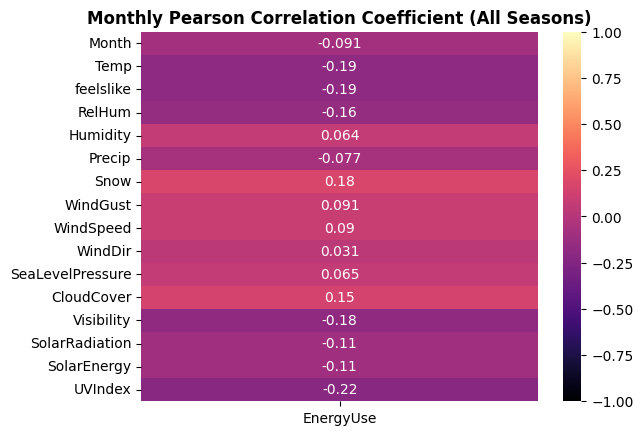

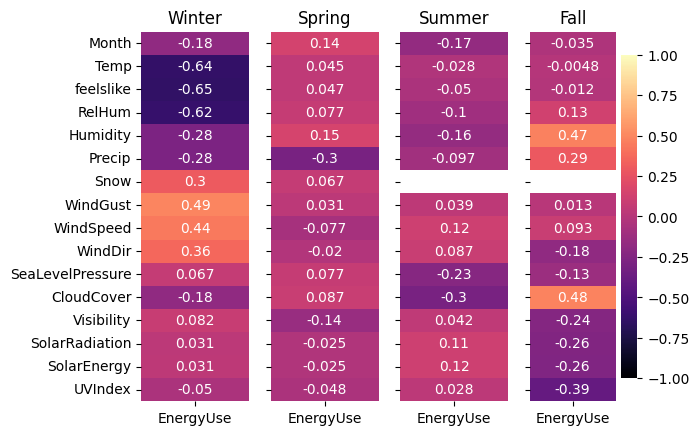

In [ ]:
# Pearson Corellation (Monthly) for Bulding 2 (HSCOE)
b2_monthly_pc_df = pd.DataFrame({'Month': b2_monthly_pc_raw[:,1],
                                'EnergyUse': b2_monthly_pc_raw[:,3],
                                'Temp': b2_monthly_pc_raw[:,8],
                                'feelslike': b2_monthly_pc_raw[:,11],
                                'RelHum': b2_monthly_pc_raw[:,12],
                                'Humidity': b2_monthly_pc_raw[:,13],
                                'Precip': b2_monthly_pc_raw[:,14],
                                'Snow': b2_monthly_pc_raw[:,18],
                                'WindGust': b2_monthly_pc_raw[:,20],
                                'WindSpeed': b2_monthly_pc_raw[:,21],
                                'WindDir': b2_monthly_pc_raw[:,22],
                                'SeaLevelPressure': b2_monthly_pc_raw[:,23],
                                'CloudCover': b2_monthly_pc_raw[:,24],
                                'Visibility': b2_monthly_pc_raw[:,25],
                                'SolarRadiation': b2_monthly_pc_raw[:,26],
                                'SolarEnergy': b2_monthly_pc_raw[:,27],
                                'UVIndex': b2_monthly_pc_raw[:,28]})

b2_daily_pc_df = pd.DataFrame({ 'Month': b2_daily_pc_raw[:,2],
                                'EnergyUse': b2_daily_pc_raw[:,6],
                                'Temp': b2_daily_pc_raw[:,11],
                                'feelslike': b2_daily_pc_raw[:,14],
                                'RelHum': b2_daily_pc_raw[:,15],
                                'Humidity': b2_daily_pc_raw[:,16],
                                'Precip': b2_daily_pc_raw[:,17],
                                'Snow': b2_daily_pc_raw[:,21],
                                'WindGust': b2_daily_pc_raw[:,23],
                                'WindSpeed': b2_daily_pc_raw[:,24],
                                'WindDir': b2_daily_pc_raw[:,25],
                                'SeaLevelPressure': b2_daily_pc_raw[:,26],
                                'CloudCover': b2_daily_pc_raw[:,27],
                                'Visibility': b2_daily_pc_raw[:,28],
                                'SolarRadiation': b2_daily_pc_raw[:,29],
                                'SolarEnergy': b2_daily_pc_raw[:,30],
                                'UVIndex': b2_daily_pc_raw[:,31]})

b2_hourly_pc_df = pd.DataFrame({'Month': b2_hourly_pc_raw[:,1],
                                'EnergyUse': b2_hourly_pc_raw[:,8],
                                'Temp': b2_hourly_pc_raw[:,9],
                                'feelslike': b2_hourly_pc_raw[:,10],
                                'RelHum': b2_hourly_pc_raw[:,11],
                                'Humidity': b2_hourly_pc_raw[:,12],
                                'Precip': b2_hourly_pc_raw[:,13],
                                'Snow': b2_hourly_pc_raw[:,16],
                                'WindGust': b2_hourly_pc_raw[:,18],
                                'WindSpeed': b2_hourly_pc_raw[:,19],
                                'WindDir': b2_hourly_pc_raw[:,20],
                                'SeaLevelPressure': b2_hourly_pc_raw[:,21],
                                'CloudCover': b2_hourly_pc_raw[:,22],
                                'Visibility': b2_hourly_pc_raw[:,23],
                                'SolarRadiation': b2_hourly_pc_raw[:,24],
                                'SolarEnergy': b2_hourly_pc_raw[:,25],
                                'UVIndex': b2_hourly_pc_raw[:,26]})

# All Seasons
b2_monthly_all_pearson = b2_monthly_pc_df.corr(method='pearson')
b2_monthly_all_pearson = b2_monthly_all_pearson[['EnergyUse']].drop('EnergyUse')

b2all_monthly = sns.heatmap(b2_monthly_all_pearson, annot=True, cmap='magma', vmin=-1, vmax=1)
b2all_monthly.set_title('Monthly Pearson Correlation Coefficient (All Seasons)', fontweight='bold')
plt.show()

# Seperate Date by Season (MONTHLY)
b2_monthly_winter = b2_monthly_pc_df[(b2_monthly_pc_df['Month'] == 1) | (b2_monthly_pc_df['Month'] == 2) | (b2_monthly_pc_df['Month'] == 12)]
# print(b2_monthly_winter)

b2_monthly_spring = b2_monthly_pc_df[(b2_monthly_pc_df['Month'] == 3) | (b2_monthly_pc_df['Month'] == 4) | (b2_monthly_pc_df['Month'] == 5)]
# print(b2_monthly_spring)

b2_monthly_summer = b2_monthly_pc_df[(b2_monthly_pc_df['Month'] == 6) | (b2_monthly_pc_df['Month'] == 7) | (b2_monthly_pc_df['Month'] == 8)]
# print(b2_monthly_summer)

b2_monthly_fall = b2_monthly_pc_df[(b2_monthly_pc_df['Month'] == 9) | (b2_monthly_pc_df['Month'] == 10) | (b2_monthly_pc_df['Month'] == 11)]
# print(b2_monthly_fall)

# Winter
b2_monthly_winter_pearson = b2_monthly_winter.corr(method='pearson')
b2_monthly_winter_ener_pearson = b2_monthly_winter_pearson[['EnergyUse']].drop('EnergyUse')

# Spring
b2_monthly_spring_pearson = b2_monthly_spring.corr(method='pearson')
b2_monthly_spring_ener_pearson = b2_monthly_spring_pearson[['EnergyUse']].drop('EnergyUse')

# Summer
b2_monthly_summer_pearson = b2_monthly_summer.corr(method='pearson')
b2_monthly_summer_ener_pearson = b2_monthly_summer_pearson[['EnergyUse']].drop('EnergyUse')

# Fall
b2_monthly_fall_pearson = b2_monthly_fall.corr(method='pearson')
b2_monthly_fall_ener_pearson = b2_monthly_fall_pearson[['EnergyUse']].drop('EnergyUse')

f,  (pc_b2_win, pc_b2_spr, pc_b2_sum, pc_b2_fal) = plt.subplots(1, 4, sharey=True)
#f.suptitle('Daily Pearson Correlation Coefficient (Individual Seasons)', fontweight='bold')
g1 = sns.heatmap(b2_monthly_winter_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b2_win)
pc_b2_win.set_title('Winter')

g2 = sns.heatmap(b2_monthly_spring_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b2_spr)
pc_b2_spr.set_title('Spring')

g3 = sns.heatmap(b2_monthly_summer_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b2_sum)
pc_b2_sum.set_title('Summer')

g4 = sns.heatmap(b2_monthly_fall_ener_pearson, annot=True, cmap='magma', vmin=-1, vmax=1, ax=pc_b2_fal)
pc_b2_fal.set_title('Fall')
plt.show()


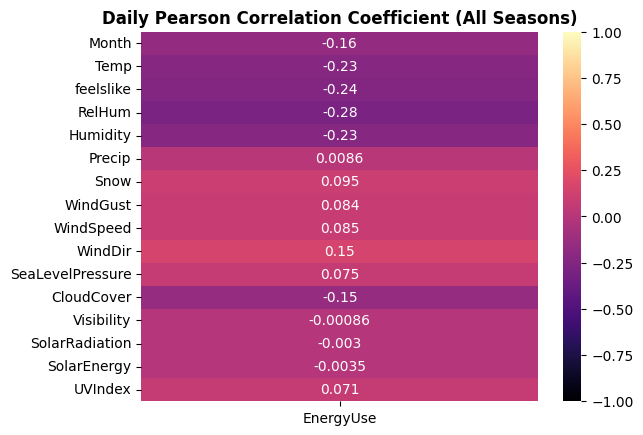

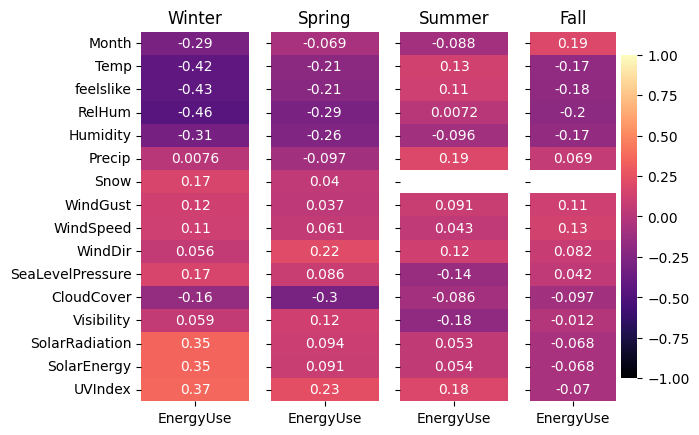

In [ ]:
# Pearson Corellation (Daily)
# All Seasons
b2_daily_all_pearson = b2_daily_pc_df.corr(method='pearson')
b2_daily_all_pearson = b2_daily_all_pearson[['EnergyUse']].drop('EnergyUse')

b2all = sns.heatmap(b2_daily_all_pearson, annot=True, cmap='magma', vmin=-1, vmax=1)
b2all.set_title('Daily Pearson Correlation Coefficient (All Seasons)', fontweight='bold')
plt.show()

# Seperate Data by Season (DAILY)
b2_daily_winter = b2_daily_pc_df[(b2_daily_pc_df['Month'] == 1) | (b2_daily_pc_df['Month'] == 2) | (b2_daily_pc_df['Month'] == 12)]
# print(b2_daily_winter)

b2_daily_spring = b2_daily_pc_df[(b2_daily_pc_df['Month'] == 3) | (b2_daily_pc_df['Month'] == 4) | (b2_daily_pc_df['Month'] == 5)]
# print(b2_daily_spring)

b2_daily_summer = b2_daily_pc_df[(b2_daily_pc_df['Month'] == 6) | (b2_daily_pc_df['Month'] == 7) | (b2_daily_pc_df['Month'] == 8)]
# print(b2_daily_summer)

b2_daily_fall = b2_daily_pc_df[(b2_daily_pc_df['Month'] == 9) | (b2_daily_pc_df['Month'] == 10) | (b2_daily_pc_df['Month'] == 11)]
# print(b2_daily_fall)

# Winter
b2_daily_winter_pearson = b2_daily_winter.corr(method='pearson')
b2_daily_winter_ener_pearson = b2_daily_winter_pearson[['EnergyUse']].drop('EnergyUse')

# Spring
b2_daily_spring_pearson = b2_daily_spring.corr(method='pearson')
b2_daily_spring_ener_pearson = b2_daily_spring_pearson[['EnergyUse']].drop('EnergyUse')

# Summer
b2_daily_summer_pearson = b2_daily_summer.corr(method='pearson')
b2_daily_summer_ener_pearson = b2_daily_summer_pearson[['EnergyUse']].drop('EnergyUse')

# Fall
b2_daily_fall_pearson = b2_daily_fall.corr(method='pearson')
b2_daily_fall_ener_pearson = b2_daily_fall_pearson[['EnergyUse']].drop('EnergyUse')

f,  (pc_b2_win, pc_b2_spr, pc_b2_sum, pc_b2_fal) = plt.subplots(1, 4, sharey=True)
#f.suptitle('Daily Pearson Correlation Coefficient (Individual Seasons)', fontweight='bold')
g1 = sns.heatmap(b2_daily_winter_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b2_win)
pc_b2_win.set_title('Winter')

g2 = sns.heatmap(b2_daily_spring_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b2_spr)
pc_b2_spr.set_title('Spring')

g3 = sns.heatmap(b2_daily_summer_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b2_sum)
pc_b2_sum.set_title('Summer')

g4 = sns.heatmap(b2_daily_fall_ener_pearson, annot=True, cmap='magma', vmin=-1, vmax=1, ax=pc_b2_fal)
pc_b2_fal.set_title('Fall')
plt.show()

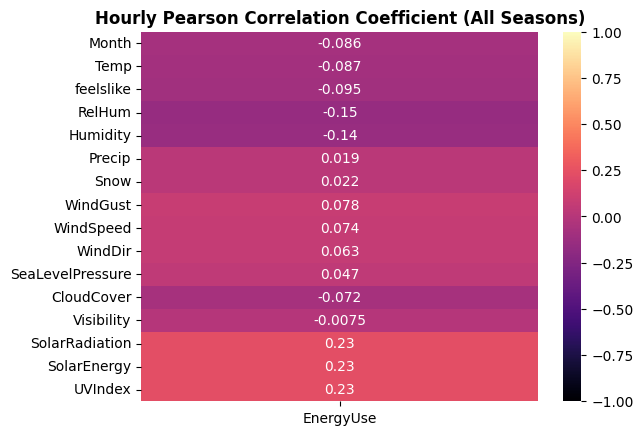

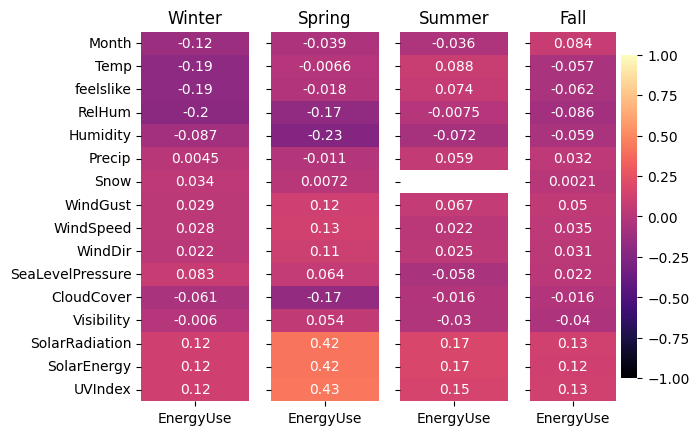

In [ ]:
# Pearson Corellation (Hourly)
# All Seasons
b2_hourly_all_pearson = b2_hourly_pc_df.corr(method='pearson')
b2_hourly_all_pearson = b2_hourly_all_pearson[['EnergyUse']].drop('EnergyUse')

b2all_hourly = sns.heatmap(b2_hourly_all_pearson, annot=True, cmap='magma', vmin=-1, vmax=1)
b2all_hourly.set_title('Hourly Pearson Correlation Coefficient (All Seasons)', fontweight='bold')
plt.show()

# Seperate Data by Season (HOURLY)
b2_hourly_winter = b2_hourly_pc_df[(b2_hourly_pc_df['Month'] == 1) | (b2_hourly_pc_df['Month'] == 2) | (b2_hourly_pc_df['Month'] == 12)]
# print(b2_hourly_winter)

b2_hourly_spring = b2_hourly_pc_df[(b2_hourly_pc_df['Month'] == 3) | (b2_hourly_pc_df['Month'] == 4) | (b2_hourly_pc_df['Month'] == 5)]
# print(b2_hourly_spring)

b2_hourly_summer = b2_hourly_pc_df[(b2_hourly_pc_df['Month'] == 6) | (b2_hourly_pc_df['Month'] == 7) | (b2_hourly_pc_df['Month'] == 8)]
# print(b2_hourly_summer)

b2_hourly_fall = b2_hourly_pc_df[(b2_hourly_pc_df['Month'] == 9) | (b2_hourly_pc_df['Month'] == 10) | (b2_hourly_pc_df['Month'] == 11)]
# print(b2_hourly_fall)

# Winter
b2_hourly_winter_pearson = b2_hourly_winter.corr(method='pearson')
b2_hourly_winter_ener_pearson = b2_hourly_winter_pearson[['EnergyUse']].drop('EnergyUse')

# Spring
b2_hourly_spring_pearson = b2_hourly_spring.corr(method='pearson')
b2_hourly_spring_ener_pearson = b2_hourly_spring_pearson[['EnergyUse']].drop('EnergyUse')

# Summer
b2_hourly_summer_pearson = b2_hourly_summer.corr(method='pearson')
b2_hourly_summer_ener_pearson = b2_hourly_summer_pearson[['EnergyUse']].drop('EnergyUse')

# Fall
b2_hourly_fall_pearson = b2_hourly_fall.corr(method='pearson')
b2_hourly_fall_ener_pearson = b2_hourly_fall_pearson[['EnergyUse']].drop('EnergyUse')

f,  (pc_b2_win, pc_b2_spr, pc_b2_sum, pc_b2_fal) = plt.subplots(1, 4, sharey=True)
#f.suptitle('Daily Pearson Correlation Coefficient (Individual Seasons)', fontweight='bold')
g1 = sns.heatmap(b2_hourly_winter_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b2_win)
pc_b2_win.set_title('Winter')

g2 = sns.heatmap(b2_hourly_spring_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b2_spr)
pc_b2_spr.set_title('Spring')

g3 = sns.heatmap(b2_hourly_summer_ener_pearson, annot=True, cmap='magma', cbar=False, vmin=-1, vmax=1, ax=pc_b2_sum)
pc_b2_sum.set_title('Summer')

g4 = sns.heatmap(b2_hourly_fall_ener_pearson, annot=True, cmap='magma', vmin=-1, vmax=1, ax=pc_b2_fal)
pc_b2_fal.set_title('Fall')
plt.show()